###Datasets :
  * Viajes 2023: https://data.buenosaires.gob.ar/dataset/viajes-etapas-transporte-publico/resource/8fbf2e1f-6381-455d-9fa2-23ecde6d88cd **(USADO)**
  * Etapas 2023: https://data.buenosaires.gob.ar/dataset/viajes-etapas-transporte-publico/resource/1e05821f-46de-46b5-94f6-a072004b974b
  * Códigos de departamentos: https://data.buenosaires.gob.ar/dataset/viajes-etapas-transporte-publico/resource/83e52250-380d-45b6-bdde-bc542b7bd78d
  * Recorrido colectivos: https://data.buenosaires.gob.ar/dataset/colectivos-recorridos/resource/juqdkmgo-564-resource
  * Paradas de Colectivo: https://data.buenosaires.gob.ar/dataset/colectivos-paradas/resource/d0e599d2-3e78-4fb2-9255-30a2be0525f8 **(USADO)**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
drive.mount('/content/drive')

df_viajes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/viajes_BAdata_20231004.csv')
df_paradas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/paradas-de-colectivo.csv')

display(df_paradas.head())
display(df_paradas.info())
display(df_paradas.describe())

print("--------------------------------------------------------------------------------------------------------------")

display(df_viajes.head())
display(df_viajes.info())
display(df_viajes.describe())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,fid,CALLE,ALT PLANO,DIRECCION,coord_X,coord_Y,COMUNA,BARRIO,L1,l1_sen,L2,l2_sen,L3,l3_sen,L4,l4_sen,L5,l5_sen,L6,l6_sen
0,1,DEFENSA,1524,1524 DEFENSA,"-58,3709946","-34,62565880",1,SAN TELMO,22.0,V,53.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DEFENSA,1528,1528 DEFENSA,"-58,3709994","-34,62571060",1,SAN TELMO,29.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,BARTOLOME MITRE,906,"906 MITRE, BARTOLOME","-58,3796587","-34,60721560",1,SAN NICOLAS,105.0,V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,REGIMIENTO DE PATRICIOS AV.,51,51 REGIMIENTO DE PATRICIOS AV.,"-58,3706639","-34,63022580",4,BARRACAS,93.0,I,70.0,V,74,I,NaN,NaN,NaN,NaN,NaN,NaN
4,5,REGIMIENTO DE PATRICIOS AV.,389,389 REGIMIENTO DE PATRICIOS AV.,"-58,3703604","-34,63340970",4,BARRACAS,10.0,I,22.0,I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fid        6962 non-null   int64  
 1   CALLE      6962 non-null   object 
 2   ALT PLANO  6910 non-null   object 
 3   DIRECCION  6959 non-null   object 
 4   coord_X    6962 non-null   object 
 5   coord_Y    6962 non-null   object 
 6   COMUNA     6962 non-null   int64  
 7   BARRIO     6961 non-null   object 
 8   L1         6959 non-null   float64
 9   l1_sen     6957 non-null   object 
 10  L2         3813 non-null   float64
 11  l2_sen     3806 non-null   object 
 12  L3         587 non-null    object 
 13  l3_sen     586 non-null    object 
 14  L4         98 non-null     float64
 15  l4_sen     94 non-null     object 
 16  L5         19 non-null     float64
 17  l5_sen     19 non-null     object 
 18  L6         8 non-null      float64
 19  l6_sen     8 non-null      object 
dtypes: float

None

,fid,COMUNA,L1,L2,L4,L5,L6
count,6962.000000,6962.000000,6959.000000,3813.000000,98.000000,19.000000,8.000000
mean,3481.500000,7.629704,75.853284,103.479937,125.908163,117.947368,92.125000
std,2009.900619,4.698454,48.415870,47.389142,43.421475,51.478662,51.493238
min,1.000000,1.000000,1.000000,1.000000,8.000000,42.000000,45.000000
25%,1741.250000,4.000000,37.000000,67.000000,105.500000,64.000000,45.000000
50%,3481.500000,8.000000,71.000000,107.000000,130.000000,135.000000,80.000000
75%,5221.750000,12.000000,110.000000,135.000000,161.000000,150.000000,146.000000
max,6962.000000,76.000000,195.000000,195.000000,193.000000,180.000000,150.000000


--------------------------------------------------------------------------------------------------------------


,id_tarjeta,id_viaje,cantidad_etapas,rango_horario,etapas_subte,etapas_tren,etapas_colectivo,longitud_origen_viaje,latitud_origen_viaje,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
0,1782021,1,2,13,0,1,1,-58.386578,-34.859386,-58.336078,-34.808313,6028,6028.0,1.272294,f,NaN,NaN
1,2874806,1,1,19,0,0,1,-58.346651,-34.818039,-58.336723,-34.805029,6028,6028.0,1.457431,f,F,50.0
2,2107689,1,1,12,0,0,1,-58.341648,-34.818089,-58.336723,-34.805029,6028,6028.0,1.328859,f,F,30.0
3,1410905,1,2,8,0,0,2,-58.325080,-34.791210,-58.391213,-34.708532,6028,6434.0,1.455401,f,NaN,NaN
4,553033,1,2,6,0,1,1,-58.369806,-34.814528,-58.194702,-34.774362,6028,6091.0,1.277950,f,M,35.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7084353 entries, 0 to 7084352
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_tarjeta                  int64  
 1   id_viaje                    int64  
 2   cantidad_etapas             int64  
 3   rango_horario               int64  
 4   etapas_subte                int64  
 5   etapas_tren                 int64  
 6   etapas_colectivo            int64  
 7   longitud_origen_viaje       float64
 8   latitud_origen_viaje        float64
 9   longitud_destino_viaje      float64
 10  latitud_destino_viaje       float64
 11  departamento_origen_viaje   int64  
 12  departamento_destino_viaje  float64
 13  factor_expansion_viaje      float64
 14  etapas_incompletas          object 
 15  genero                      object 
 16  grupo_edad                  float64
dtypes: float64(7), int64(8), object(2)
memory usage: 918.8+ MB


None

,id_tarjeta,id_viaje,cantidad_etapas,rango_horario,etapas_subte,etapas_tren,etapas_colectivo,longitud_origen_viaje,latitud_origen_viaje,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,grupo_edad
count,7.084353e+06,7.084353e+06,7.084353e+06,7.084353e+06,7.084353e+06,7.084353e+06,7.084353e+06,7.084353e+06,7.084353e+06,6.237487e+06,6.237487e+06,7.084353e+06,6.237487e+06,6.604715e+06,4.265880e+06
mean,1.548012e+06,1.893622e+00,1.377710e+00,1.294584e+01,1.104691e-01,1.562100e-01,1.111061e+00,-5.847940e+01,-3.464842e+01,-5.847533e+01,-3.464824e+01,4.852212e+03,4.811007e+03,1.415649e+00,4.157490e+01
std,8.962582e+05,1.114289e+00,6.182552e-01,4.801750e+00,3.139775e-01,3.687817e-01,6.305268e-01,1.843831e-01,1.202509e-01,1.840268e-01,1.197019e-01,2.154523e+03,2.166145e+03,2.724592e-01,1.824462e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.948063e+01,-3.557920e+01,-5.948063e+01,-3.557920e+01,2.001000e+03,2.001000e+03,1.000000e+00,0.000000e+00
25%,7.695540e+05,1.000000e+00,1.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-5.857853e+01,-3.471674e+01,-5.857168e+01,-3.471498e+01,2.010000e+03,2.010000e+03,1.252017e+00,2.500000e+01
50%,1.547332e+06,2.000000e+00,1.000000e+00,1.300000e+01,0.000000e+00,0.000000e+00,1.000000e+00,-5.845547e+01,-3.462731e+01,-5.845262e+01,-3.462659e+01,6.274000e+03,6.274000e+03,1.335593e+00,4.000000e+01
75%,2.325042e+06,2.000000e+00,2.000000e+00,1.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00,-5.838751e+01,-3.458296e+01,-5.838704e+01,-3.458356e+01,6.525000e+03,6.515000e+03,1.473032e+00,5.500000e+01
max,3.100556e+06,3.800000e+01,6.000000e+00,2.300000e+01,3.000000e+00,3.000000e+00,6.000000e+00,-5.772941e+01,-3.404078e+01,-5.772941e+01,-3.404078e+01,6.882000e+03,6.882000e+03,3.000000e+00,1.000000e+02


In [ ]:
# --- Limpieza y Filtrado de df_paradas ---

# 1. Renombrar columnas
df_paradas.rename(columns={
    'coord_X': 'longitud',
    'coord_Y': 'latitud',
    'COMUNA': 'comuna'
}, inplace=True)

# 2. Convertir coordenadas a tipo numérico
df_paradas['longitud'] = df_paradas['longitud'].str.replace(',', '.').astype(float)
df_paradas['latitud'] = df_paradas['latitud'].str.replace(',', '.').astype(float)

# 3. Eliminar valores nulos en columnas críticas
df_paradas.dropna(subset=['longitud', 'latitud', 'comuna'], inplace=True)

# 4. Asegurarse de que la comuna sea un entero
df_paradas['comuna'] = df_paradas['comuna'].astype(int)

# 5. Seleccionar solo las columnas que necesitamos para el mapeo
df_paradas_clean = df_paradas[['longitud', 'latitud', 'comuna']].copy()

# 6. AED Estadistico
df_paradas_clean.info()
display(df_paradas_clean.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6962 entries, 0 to 6961
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   longitud  6962 non-null   float64
 1   latitud   6962 non-null   float64
 2   comuna    6962 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 163.3 KB


,longitud,latitud,comuna
0,-58.370995,-34.625659,1
1,-58.370999,-34.625711,1
2,-58.379659,-34.607216,1
3,-58.370664,-34.630226,4
4,-58.370360,-34.633410,4


In [ ]:
# --- Limpieza y Filtrado de df_viajes ---

# 1. Renombrar columnas
df_viajes.rename(columns={
    'rango_horario': 'hora',
    'longitud_origen_viaje': 'lon_o',
    'latitud_origen_viaje': 'lat_o'
}, inplace=True)

# 2. Filtrar solo los viajes que usan colectivo
df_colectivos = df_viajes[df_viajes['etapas_colectivo'] > 0].copy()
print(f"Número de viajes que usan colectivo: {len(df_colectivos)}")

# 3. Eliminar viajes con coordenadas de origen nulas
df_colectivos.dropna(subset=['lon_o', 'lat_o'], inplace=True)

# 4. AED Estadistico
df_colectivos.info()
display(df_colectivos.head())

Número de viajes que usan colectivo: 6229484
<class 'pandas.core.frame.DataFrame'>
Index: 6229484 entries, 0 to 7084352
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_tarjeta                  int64  
 1   id_viaje                    int64  
 2   cantidad_etapas             int64  
 3   hora                        int64  
 4   etapas_subte                int64  
 5   etapas_tren                 int64  
 6   etapas_colectivo            int64  
 7   lon_o                       float64
 8   lat_o                       float64
 9   longitud_destino_viaje      float64
 10  latitud_destino_viaje       float64
 11  departamento_origen_viaje   int64  
 12  departamento_destino_viaje  float64
 13  factor_expansion_viaje      float64
 14  etapas_incompletas          object 
 15  genero                      object 
 16  grupo_edad                  float64
dtypes: float64(7), int64(8), object(2)
memory usage: 855.5+ MB


,id_tarjeta,id_viaje,cantidad_etapas,hora,etapas_subte,etapas_tren,etapas_colectivo,lon_o,lat_o,longitud_destino_viaje,latitud_destino_viaje,departamento_origen_viaje,departamento_destino_viaje,factor_expansion_viaje,etapas_incompletas,genero,grupo_edad
0,1782021,1,2,13,0,1,1,-58.386578,-34.859386,-58.336078,-34.808313,6028,6028.0,1.272294,f,NaN,NaN
1,2874806,1,1,19,0,0,1,-58.346651,-34.818039,-58.336723,-34.805029,6028,6028.0,1.457431,f,F,50.0
2,2107689,1,1,12,0,0,1,-58.341648,-34.818089,-58.336723,-34.805029,6028,6028.0,1.328859,f,F,30.0
3,1410905,1,2,8,0,0,2,-58.325080,-34.791210,-58.391213,-34.708532,6028,6434.0,1.455401,f,NaN,NaN
4,553033,1,2,6,0,1,1,-58.369806,-34.814528,-58.194702,-34.774362,6028,6091.0,1.277950,f,M,35.0


In [ ]:
# 1. Preparación de datos de paradas ---
X_paradas = df_paradas_clean[['longitud', 'latitud']]
y_paradas = df_paradas_clean['comuna']

# 2. División 80/20 para entrenamiento y validación ---
X_train, X_test, y_train, y_test = train_test_split(
    X_paradas, y_paradas,
    test_size=0.2,
    random_state=42
)

# 3. Definición de modelos de clasificación ---
models_clasificacion = {
    "KNeighborsClassifier": KNeighborsClassifier(n_neighbors=5, n_jobs=-1),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
}

# 4. Entrenar, predecir y mostrar métricas ---
for name, model in models_clasificacion.items():
    print(f"\n=== {name} ===")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

# 5. Retrain final con el mejor modelo ---
final_clf = models_clasificacion["RandomForestClassifier"]
final_clf.fit(X_paradas, y_paradas)
print("\nRandomForestClassifier re-entrenado con el 100% de los datos de paradas.")

# 6. Predicción de comuna de origen en viajes ---
X_pred_comunas = (
    df_colectivos[['lon_o', 'lat_o']]
    .rename(columns={'lon_o': 'longitud', 'lat_o': 'latitud'})
)
df_colectivos['comuna_origen'] = final_clf.predict(X_pred_comunas).astype(int)

print("Asignación de comunas completada. Muestra de resultados:")
display(df_colectivos[['hora', 'lon_o', 'lat_o', 'comuna_origen']].head())



=== KNeighborsClassifier ===
Accuracy: 0.9124

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.97      0.96       182
           2       0.92      0.92      0.92        63
           3       0.97      0.94      0.96        83
           4       0.96      0.93      0.94       149
           5       0.87      0.92      0.90        75
           6       0.84      0.81      0.82        69
           7       0.85      0.86      0.85        91
           8       0.93      0.96      0.95        73
           9       0.93      0.88      0.90        90
          10       0.81      0.91      0.86        70
          11       0.96      0.83      0.89        83
          12       0.97      0.90      0.93       102
          13       0.90      0.90      0.90        69
          14       0.87      0.98      0.92        88
          15       0.90      0.90      0.90       106

    accuracy                           0.91      1393
   macro 

,hora,lon_o,lat_o,comuna_origen
0,13,-58.386578,-34.859386,4
1,19,-58.346651,-34.818039,4
2,12,-58.341648,-34.818089,4
3,8,-58.325080,-34.791210,4
4,6,-58.369806,-34.814528,4


In [ ]:
# --- DataFrame de Demanda ---

# 1. Agrupar por 'comuna_origen' y 'hora' y contar la cantidad de viajes
df_demanda = df_colectivos.groupby(['comuna_origen', 'hora']).size().reset_index(name='cantidad_viajes')

# 2. Ordenar los datos
df_demanda.sort_values(by=['comuna_origen', 'hora'], inplace=True)

print("\n--- DataFrame final para el modelado ---")
df_demanda.info()
display(df_demanda.head(10))

# 3. Guardar el dataset limpio
df_demanda.to_csv('demanda_colectivos_limpio.csv', index=False)


--- DataFrame final para el modelado ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   comuna_origen    360 non-null    int64
 1   hora             360 non-null    int64
 2   cantidad_viajes  360 non-null    int64
dtypes: int64(3)
memory usage: 8.6 KB


,comuna_origen,hora,cantidad_viajes
0,1,0,2250
1,1,1,1202
2,1,2,508
3,1,3,343
4,1,4,920
5,1,5,4263
6,1,6,9223
7,1,7,14373
8,1,8,13057
9,1,9,11207


In [ ]:
# 1. Cargar el dataset de Demanda
try:
    df_demanda = pd.read_csv('demanda_colectivos_limpio.csv')
except FileNotFoundError:
    print("Error: No se encontró el archivo 'demanda_colectivos_limpio.csv'.")

# Preparo el nuevo modelos para regresion para predecir la demanda

# 2. Separar las variables: Features (X) y Target (y)
X = df_demanda[['comuna_origen', 'hora']]
y = df_demanda['cantidad_viajes']

print("Variables predictoras (X):")
display(X.head())
print("Variable objetivo (y):")
display(y.head())

Variables predictoras (X):


,comuna_origen,hora
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4


Variable objetivo (y):


,cantidad_viajes
0,2250
1,1202
2,508
3,343
4,920


In [ ]:
# 80% para entrenamiento, 20% para prueba.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Crear una instancia del modelo.
# n_estimators=100 -> 100 árboles de decisión.
model_regresion = RandomForestRegressor(n_estimators=150, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo con los datos de entrenamiento.
model_regresion.fit(X_train, y_train)

# El modelo entrenado para predecir la cantidad de viajes
y_pred = model_regresion.predict(X_test)

# 1. Calcular el R-cuadrado (R²)
r2 = r2_score(y_test, y_pred)

# 2. Calcular el Error Cuadrático Medio (MSE) y la Raíz (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("--- Evaluación del Modelo ---")
print(f"Coeficiente de Determinación (R²): {r2:.3f}")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")

print(f"\nInterpretación:")
print(f"El modelo puede explicar aproximadamente el {r2:.1%} de la variabilidad en la cantidad de viajes.")
print(f"En promedio, las predicciones del modelo tienen un error de ±{rmse:.0f} viajes.")

¡Modelo Random Forest entrenado exitosamente!
--- Evaluación del Modelo ---
Coeficiente de Determinación (R²): 0.936
Error Cuadrático Medio (MSE): 42098587.22
Raíz del Error Cuadrático Medio (RMSE): 6488.34

Interpretación:
El modelo puede explicar aproximadamente el 93.6% de la variabilidad en la cantidad de viajes.
En promedio, las predicciones del modelo tienen un error de ±6488 viajes.


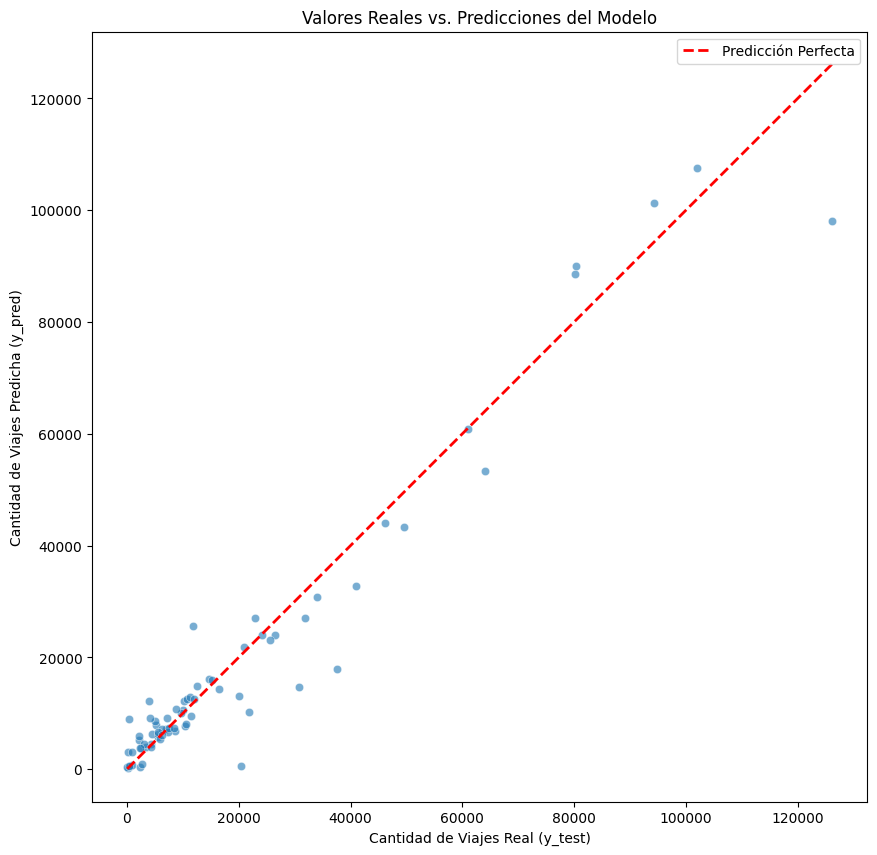

In [ ]:
results_df = pd.DataFrame({'Valores Reales': y_test, 'Predicciones': y_pred})

plt.figure(figsize=(10, 10))
sns.scatterplot(data=results_df, x='Valores Reales', y='Predicciones', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Predicción Perfecta')

plt.title('Valores Reales vs. Predicciones del Modelo')
plt.xlabel('Cantidad de Viajes Real (y_test)')
plt.ylabel('Cantidad de Viajes Predicha (y_pred)')
plt.legend()
plt.axis('equal')
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

comuna_slider = widgets.IntSlider(min=1, max=15, step=1, description='Comuna:')
hora_slider = widgets.IntSlider(min=0, max=23, step=1, description='Hora:')
predict_button = widgets.Button(description="Predecir Demanda")
output_label = widgets.Label()

def on_button_clicked(b):
    comuna = comuna_slider.value
    hora = hora_slider.value
    input_data = pd.DataFrame([[comuna, hora]], columns=['comuna_origen', 'hora'])
    # Realizar la predicción
    predicted_demand = model_regresion.predict(input_data)
    # Mostrar el resultado
    output_label.value = f'Demanda predicha: {int(predicted_demand[0])} viajes'

predict_button.on_click(on_button_clicked)

display(comuna_slider, hora_slider, predict_button, output_label)

IntSlider(value=1, description='Comuna:', max=15, min=1)

IntSlider(value=0, description='Hora:', max=23)

Button(description='Predecir Demanda', style=ButtonStyle())

Label(value='')

##**Creo la hoja de calculo para usar en looker**

In [ ]:
!pip install gspread google-auth-oauthlib google-auth-httplib2

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)


Autenticación y conexión con Google Sheets exitosa.


In [ ]:
df_demanda_looker = df_demanda.copy()

df_resultados_looker = pd.DataFrame({
    'comuna_origen': X_test['comuna_origen'],
    'hora': X_test['hora'],
    'demanda_real': y_test,
    'demanda_predicha': y_pred.round(0).astype(int)
})

df_paradas_looker = df_paradas_clean[['latitud', 'longitud', 'comuna']].copy()

def df_to_gsheet(df, spreadsheet_name, worksheet_name):

    try:
        sh = gc.open(spreadsheet_name)
    except gspread.SpreadsheetNotFound:
        sh = gc.create(spreadsheet_name)

    try:
        worksheet = sh.worksheet(worksheet_name)
        worksheet.clear()
    except gspread.WorksheetNotFound:
        worksheet = sh.add_worksheet(title=worksheet_name, rows=1, cols=1)

    worksheet.update([df.columns.values.tolist()] + df.values.tolist())
    print(f"DataFrame '{worksheet_name}' subido a la Hoja de Cálculo '{spreadsheet_name}'")
    sh.share(None, perm_type='anyone', role='reader')
    return sh.url

spreadsheet_name = "TPO_Ciencia_Datos_TrasporteDatos"
url_demanda = df_to_gsheet(df_demanda_looker, spreadsheet_name, "demanda_agregada")
url_resultados = df_to_gsheet(df_resultados_looker, spreadsheet_name, "resultados_modelo")
url_paradas = df_to_gsheet(df_paradas_looker, spreadsheet_name, "paradas_geo")

DataFrame 'demanda_agregada' subido a la Hoja de Cálculo 'TPO_Ciencia_Datos_TrasporteDatos'
DataFrame 'resultados_modelo' subido a la Hoja de Cálculo 'TPO_Ciencia_Datos_TrasporteDatos'
DataFrame 'paradas_geo' subido a la Hoja de Cálculo 'TPO_Ciencia_Datos_TrasporteDatos'
